---
numbering:
  title:
    offset: 1
---


# Exercises, examples \& solutions

## Examples

### Newton's Cradle
Click on the <a href="https://www.myphysicslab.com/engine2D/newtons-cradle-en.html">link</a> for an applet on Newton's cradle (gives you also the possibility to 'play' with different numerical solvers, from (too) simple to advanced).

## Exercises
````{exercise} Colliding Superballs &#127798;
Watch [this video on bouncing superballs](https://www.youtube.com/embed/2UHS883_P60?si=KYY0YWHbW-a3UqwU). We discussed this problem in [this chapter](./Ch7_ConservationEquations.md).
 
```{code-cell} python
:tag: hide-input

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
-
N=300
t_end = 20
dt = t_end/N
t = np.linspace(0,t_end,N)

bardikte = 0.01
barx = [-0.1, 0.1]
barz = [ -bardikte, -bardikte ]

Dbig = 100
Dmedium = 50
Dsmall = 20
vbig = -1
vmedium = vbig
vsmall = vbig
z0= 10

scaling = 50/1.555

x = np.linspace(0,0,N)
zb = np.linspace(z0 + Dbig/2/scaling , z0 + Dbig/2/scaling , N)
zm = np.linspace(z0 + (Dbig + Dmedium/2)/scaling, z0 + (Dbig + Dmedium/2)/scaling,N)
zs = np.linspace(z0 + (Dbig + Dmedium + Dsmall/2)/scaling, z0 + (Dbig + Dmedium + Dsmall/2)/scaling,N)

bardikte = 12/2/scaling
barx = [-0.1, 0.1]
barz = [ -bardikte, -bardikte ]



for i in range(1,N):
    zb[i] = zb[i-1] + vbig*dt
    zm[i] = zm[i-1] + vmedium*dt
    zs[i] = zs[i-1] + vsmall*dt
    if zb[i] - Dbig/2/scaling <0:
        vbig = -vbig
        vmedium = -3*vmedium
        vsmall = -7*vsmall
        print('joepie, i= ',i)
    

fig, ax = plt.subplots(1,1, figsize = (10,10))
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
ax.set_ylim(-0.45, 16)
ax.plot(x[0],zb[0],'ob', markersize=100)
ax.plot(x[0],zm[0],'og', markersize=50)
ax.plot(x[0],zs[0],'or', markersize=20)
ax.plot(barx, barz,'-k', linewidth=12)

def update(frame):
    ax.clear()
    plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
    ax.set_ylim(-0.45, 16)
    ax.plot(x[frame],zb[frame],'ob', markersize=100)
    ax.plot(x[frame],zm[frame],'og', markersize=50)
    ax.plot(x[frame],zs[frame],'or', markersize=20)
    ax.plot(barx, barz,'-k', linewidth=12)
    return fig, ax

ani = FuncAnimation(fig, update, frames=range(1,N))
#ani.save("Superball_animation.gif", fps=30)

plt.figure()
plt.plot(t,zb)
```

```{figure} ../images/Superball_animation.gif 
:width: 320px
:align: center
 
```

Do you agree with the explanation in the movie?

We seem to violate the conservation of kinetic energy: there is much more kinetic energy after the collision than before! Can you figure out what is happening?

```{tip} 
Look carefully at the bouncing of the blue ball with the earth. Is it really true that the velocity after bouncing is $v$ and that the earth does not move? Probably not, as this violates conservation of momentum!
```
````

```{exercise} 1D elastic collision &#127798;
:label: ex_1D_col

Consider two particles, $m_1$ and $m_2$, moving along the $x$-axis. The two particles will elastically collide. We set mass 1 at a value of $1$ (kg) and set $m_1$ to $6$ (kg). 

Solve the collision by using conservation of momentum and kinetic energy and compare your results with those of the widget.

You can change the value of $m_1$ and of the velocities of both particles before the collision. Change the values, predict what will happen, and check your prediction.
```

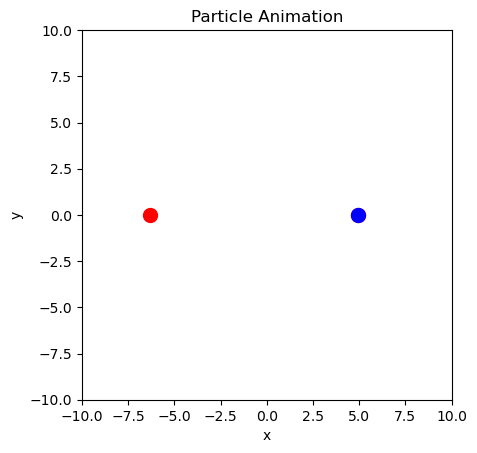

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class ParticleClass:
    def __init__(self, m, v, r, R):
        self.m = m                  # mass of the particle
        self.v = np.array(v, dtype=float)  # velocity vector
        self.r = np.array(r, dtype=float)  # position vector
        self.R = np.array(R, dtype=float)  # radius of the particle

    def update_position(self, dt):
        self.r += self.v * dt 

    def collide_detection(self, other):
        return np.linalg.norm(self.r - other.r) <= (self.R + other.R)

# Simulation parameters
dt = 0.1         # time step
num_steps = 530  # number of time steps

particleA = ParticleClass(m=1.0, v=[1, 0], r=[-2.0, 0.0],R=0.45)  
particleB = ParticleClass(m=6.0, v=[-1, 0], r=[2.0, 0.0],R=0.45)  

# Create the figure and axis

fig, ax = plt.subplots()

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal')
ax.set_title("Particle Animation")
ax.set_xlabel("x")
ax.set_ylabel("y")
dot, = ax.plot([], [], 'ro', markersize=10); # semicolon to suppress output


# Create the particle as a red dot
dotA, = ax.plot([], [], 'ro', markersize=10)
dotB, = ax.plot([], [], 'bo', markersize=10)


# Initialization function for animation
def init():
    dot.set_data([], [])
    return dotA, dotB


# Update function for each frame
def update(frame):
    particleA.update_position(dt)
    particleB.update_position(dt)

    dotA.set_data([particleA.r[0]], [particleA.r[1]])
    dotB.set_data([particleB.r[0]], [particleB.r[1]])

    #collision detection and response
    if particleA.collide_detection(particleB):

        vA, vB, mA, mB, rA, rB = particleA.v, particleB.v, particleA.m, particleB.m, particleA.r, particleB.r
        vA_new = vA - 2 * mB / (mA + mB) * np.dot(vA - vB, rA - rB) / (1e-12+np.linalg.norm(rA - rB))**2 * (rA - rB)
        vB_new = vB - 2 * mA / (mA + mB) * np.dot(vB - vA, rB - rA) / (1e-12+np.linalg.norm(rB - rA))**2 * (rB - rA)
        particleA.v = vA_new
        particleB.v = vB_new


    # wall collision detection and response
    if particleA.r[0]**2>100: # Check if particle is outside the bounds, np.abs could be used but is slower
        particleA.v[0] = -particleA.v[0]
    if particleA.r[1]**2>100: # Check if particle is outside the bounds, np.abs could be used but is slower
        particleA.v[1] = -particleA.v[1]

    dot.set_data([particleB.r[0]], [particleB.r[1]])
    if particleB.r[0]**2>100: # Check if particle is outside the bounds, np.abs could be used but is slower
        particleB.v[0] = -particleB.v[0]
    if particleB.r[1]**2>100: # Check if particle is outside the bounds, np.abs could be used but is slower
        particleB.v[1] = -particleB.v[1]

    return dotA, dotB

# Create animation
ani = FuncAnimation(fig, update, frames=range(200), init_func=init, blit=True, interval=50)

# For Jupyter notebook:
from IPython.display import HTML
HTML(ani.to_jshtml())

```{exercise} 2D elastic collision &#127798;
Next, we consider an elastic collision between $m_1$ and $m_2$, but now in a 2-dimensional setting.

In the widget below, the situation is animated. You can change the values of the initial velocity and masses. Can you (qualitatively) predict the outcome of the collision for a given set os parameters?
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from math import atan2, degrees
from IPython.display import HTML

# -------------------------------
# Adjustable Parameters
# -------------------------------
m1 = 1   # mass of particle 1
m2 = 6   # mass of particle 2
v1x = 1  # x velocity of particle 1
v1y = 0  # y velocity of particle 1
v2y = 1  # y velocity of particle 2

# -------------------------------
# Constants and Initial Velocities
# -------------------------------
dt = 0.05
t_stop = 10
tcoll = 5
scale = 40

v1 = np.array([v1x, v1y], dtype=float)
v2 = np.array([0, v2y], dtype=float)

# -------------------------------
# Compute Collision Result
# -------------------------------
def compute_collision(m1, m2, v1, v2):
    Vcg = (m1 * v1 + m2 * v2) / (m1 + m2)
    u1 = v1 - Vcg
    u2 = v2 - Vcg

    angle = atan2(u1[1], u1[0])
    R = np.array([[np.cos(angle), np.sin(angle)],
                  [-np.sin(angle), np.cos(angle)]])
    
    uac1 = R @ u1
    uac2 = R @ u2

    wac2x = ((1 - m1 / m2) * uac2[0] + 2 * m1 / m2 * uac1[0]) / (1 + m1 / m2)
    wac1x = uac2[0] - uac1[0] + wac2x

    wac1 = np.array([wac1x, 0])
    wac2 = np.array([wac2x, 0])

    R_inv = np.linalg.inv(R)
    w1 = R_inv @ wac1 + Vcg
    w2 = R_inv @ wac2 + Vcg

    return w1, w2

w1, w2 = compute_collision(m1, m2, v1, v2)
alpha_1 = round(degrees(atan2(w1[1], w1[0])) / 10) * 10
alpha_2 = round(degrees(atan2(w2[1], w2[0])) / 10) * 10

x1_init = -v1 * (t_stop - tcoll)
x2_init = -v2 * (t_stop - tcoll)

x1_coll = x1_init + v1 * tcoll
x2_coll = x2_init + v2 * tcoll

# -------------------------------
# Set Up Figure
# -------------------------------
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-300, 300)
ax.set_ylim(-300, 300)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_aspect('equal')
ax.grid()

p1, = ax.plot([], [], 'ro')
p2, = ax.plot([], [], 'bo')
path1, = ax.plot([], [], 'r--', lw=1)
path2, = ax.plot([], [], 'b--', lw=1)
angle_text = ax.text(0.02, 0.02, '', transform=ax.transAxes)

traj1, traj2 = [], []

# -------------------------------
# Animation Functions
# -------------------------------
def init():
    p1.set_data([], [])
    p2.set_data([], [])
    path1.set_data([], [])
    path2.set_data([], [])
    angle_text.set_text('')
    return p1, p2, path1, path2, angle_text

def update(frame):
    t = frame * dt
    if t < tcoll:
        pos1 = x1_init + v1 * t
        pos2 = x2_init + v2 * t
    else:
        pos1 = x1_coll + w1 * (t - tcoll)
        pos2 = x2_coll + w2 * (t - tcoll)

    traj1.append(pos1.copy())
    traj2.append(pos2.copy())

    p1.set_data([scale * pos1[0]], [scale * pos1[1]])
    p2.set_data([scale * pos2[0]], [scale * pos2[1]])

    traj1_np = np.array(traj1)
    traj2_np = np.array(traj2)

    path1.set_data(scale * traj1_np[:, 0], scale * traj1_np[:, 1])
    path2.set_data(scale * traj2_np[:, 0], scale * traj2_np[:, 1])

    if abs(t - t_stop) < dt:
        angle_text.set_text(f"α₁ = {alpha_1}°, α₂ = {alpha_2}°")

    return p1, p2, path1, path2, angle_text

# -------------------------------
# Create and Display Animation
# -------------------------------
ani = FuncAnimation(fig, update, frames=int(t_stop / dt), init_func=init, blit=True, interval=50)
HTML(ani.to_jshtml())



```{exercise} Inelastic Collision &#127798;
Particle $m_1$ is moving over the $x$-axis with unit velocity. Simultaneously, particle $m_2$ is moving over the $y$-axis also with unit velocity. Both particles will collide in the origin. The collision is inelastic with restitution coefficient $e$.

The widget below shows the trajectories of the particles and gives the velocities after the collision. Moreover, als the angle of the trajectories after the collision with the $x$-axis is given.

```{warning}
here python code for jpnb: 2DCollision.py
```

Can you solve this problem for a few values of the restitution coefficient? The 'easy ones' are for $e=0$.
```



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import display, HTML, Math
import ipywidgets as widgets

# Constants
m1_init = 1
m2_init = 1
v1x = 1
v1y = 0
v2x = 0
v2y = 1

x1_init = -1
y1_init = 0
x2_init = 0
y2_init = -1

e_init = 1


# Time setup
dt = 0.05
time_max = 1
times_neg = np.arange(-time_max, dt, dt)
times_pos = np.arange(dt, time_max, dt)
times = np.arange(-time_max, time_max, dt)
Ntimes = len(times_neg) + len(times_pos)

# Widget slider mass 1
mass1_slider = widgets.FloatSlider(
    value=1,
    min=1,
    max=5,
    step=1,
    description='m1:',
    continuous_update=False
)

# Widget slider mass 2
mass2_slider = widgets.FloatSlider(
    value=1,
    min=1,
    max=5,
    step=1,
    description='m2:',
    continuous_update=False
)

# Widget slider coeff restitution e
e_slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=1,
    step=0.1,
    description='e:',
    continuous_update=False
)

def CalcCol(m1_init,m2_init,e_init):
    #initiallise m's and v's
    e = e_init
    m1, m2 = m1_init, m2_init
    cos_2 = v2x/np.sqrt(v2x*v2x+v2y*v2y)
    sin_2 = v2y/np.sqrt(v2x*v2x+v2y*v2y)
    
    # velo center of gravity
    Vcg_x=(m1*v1x+m2*v2x)/(m1+m2)
    Vcg_y=(m1*v1y+m2*v2y)/(m1+m2)
    #relative velos before coll in COG
    u1x=v1x-Vcg_x
    u1y=v1y-Vcg_y
    u2x=v2x-Vcg_x
    u2y=v2y-Vcg_y
    u1=np.sqrt(u1x*u1x+u1y*u1y)
    u2=np.sqrt(u2x*u2x+u2y*u2y)
    cos_1=u1x/u1
    sin_1=u1y/u1
    cos_2=u2x/u2
    sin_2=u2y/u2

	#rotation matrix to rotatate to 1D picture -> particles moving over x-axis
    A11=cos_1
    A12=sin_1
    A21=-sin_1
    A22=cos_1
    uac1x=A11*u1x+A12*u1y
    uac1y=A21*u1x+A22*u1y
    uac2x=A11*u2x+A12*u2y
    uac2y=A21*u2x+A22*u2y
    
    #new velos: do a 1D inelastic collision
    wac1x=(m1*uac1x+m2*uac2x-e*m2*(uac1x-uac2x))/(m1+m2)
    wac2x=wac1x + e*(uac1x-uac2x)
    wac1y=0
    wac2y=0
    #rotate back
    w1x=A11*wac1x-A12*wac1y
    w1y=-A21*wac1x+A22*wac1y
    w2x=A11*wac2x-A12*wac2y
    w2y=-A21*wac2x+A22*wac2y
    #transform back to lab frame
    vnew1_x=w1x+Vcg_x
    vnew1_y=w1y+Vcg_y
    vnew2_x=w2x+Vcg_x
    vnew2_y=w2y+Vcg_y
    if np.abs(vnew1_x) <0.0001:
        alpha_1 = 90
    else:
        alpha_1 = round(np.arctan(vnew1_y / vnew1_x)/np.pi*180)
    if np.abs(vnew2_x) <0.0001:
        alpha_2 = 90
    else:
        alpha_2 = round(np.arctan(vnew2_y / vnew2_x)/np.pi*180)
    if (vnew1_y>=0 and vnew1_x<0):
        alpha_1 = 180+alpha_1

    print('velocities after collision')
    print('u1_x= ',round(vnew1_x,2),' u1_y= ', round(vnew1_y,2),' u2_x= ', round(vnew2_x,2),' u2_y= ', round(vnew2_y,2))
    print('angles oftrajectories with x-axis after the collision:')
    print('\u03B1_1 = ',round(alpha_1,2),'      \u03B1_2 = ',round(alpha_2,2))
    
    return vnew1_x, vnew1_y, vnew2_x, vnew2_y, alpha_1, alpha_2
    
def generate_animation(m1_init,m2_init,e_init):
    x1 = v1x*(-time_max)
    x2 = v2x*(-time_max)
    y1 = v1y*(-time_max)
    y2 = v2y*(-time_max)
    
    m1, m2 = m1_init, m2_init
    e = e_init

    u1_x, u1_y, u2_x, u2_y, a1, a2 = CalcCol(m1_init,m2_init,e_init)
    
    # Position history
    x1_list, y1_list = [], []
    x2_list, y2_list = [], []

    for t in times_neg:
        x1_t = v1x * t
        y1_t = v1y * t
        x1_list.append(x1_t)
        y1_list.append(y1_t)
        x2_t = v2x * t
        y2_t = v2y * t
        x2_list.append(x2_t)
        y2_list.append(y2_t)

    for t in times_pos:
        x1_t = u1_x * t
        y1_t = u1_y * t
        x1_list.append(x1_t)
        y1_list.append(y1_t)
        x2_t = u2_x * t
        y2_t = u2_y * t
        x2_list.append(x2_t)
        y2_list.append(y2_t)
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
#    ax.set_yticks([])
    ax.set_title("2D Collision")
    ax.plot([-1.1,1.1],[0,0], color='grey')
    ax.plot([0,0],[-1.1,1.1], color='grey')

    p1, = ax.plot([], [], 'ro', markersize=6, label='Particle 1')
    p2, = ax.plot([], [], 'bo', markersize=6, label='Particle 2')
    p1_line_f, = ax.plot((x1_list[0],x1_list[0]),(y1_list[0],y1_list[0]),'r-')
    p1_line_a, = ax.plot((0,0),(0,0),'r-')
    p2_line_f, = ax.plot((x2_list[0],x2_list[0]),(y2_list[0],y2_list[0]),'b-')
    p2_line_a, = ax.plot((0,0),(0,0),'b-')
    ax.grid()
    ax.legend(loc='upper right')

    def init():
        p1.set_data([], [])
        p2.set_data([], [])
        return p1, p2

    def update(i):
        p1.set_data([x1_list[i]], [y1_list[i]])
        p2.set_data([x2_list[i]], [y2_list[i]])
        if i < len(times_neg):
            p1_line_f.set_data((x1_list[0],x1_list[i]),(y1_list[0],y1_list[i]))
            p2_line_f.set_data((x2_list[0],x2_list[i]),(y2_list[0],y2_list[i]))
        else:
            p1_line_a.set_data((0,x1_list[i]),(0,y1_list[i]))
            p2_line_a.set_data((0,x2_list[i]),(0,y2_list[i]))
        return p1, p2

    
    ani = animation.FuncAnimation(fig, update, frames=Ntimes, init_func=init,
                                  interval=50, blit=True)

    plt.close(fig)
    return HTML(ani.to_jshtml())

# Show slider and link it to animation
widgets.interact(generate_animation, 
    m1_init = mass1_slider, m2_init = mass2_slider, e_init = e_slider
    );



interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='m1:', max=5.0, min=1.0, ste…


```{exercise} Completely inelastic collision
:label: ex_91

Consider a particle with mass $M$ being at rest in your frame of reference. A second particle of mass $m$ comes in over the negative $x$-direction with velocity $v$. The collision is completely inelastic.

Find the velocities after the collision.
```

```{solution} ex_91
:class: dropdown
Given: the collision is completely inelastic. That means $e=0$ or in words: after the collision the two particles stick together and move as one particle. Thus, we have only one unknown velocity after the collision.

The problem is 1-dimensional and we can solve it by requiring conservation of momentum:

$$\begin{split}

\text{before \;\;\;\;\;\;\;} mv &+ M \cdot 0 = (m+M)U \text{ \;\;\;\;\;\;\; after} \\
\Rightarrow U &= \frac{m}{m+M} v

\end{split}$$

```


## Exercises

```{exercise} Intuitive collisions &#127798;
Consider two particles ($m_1$,$m_2$) with velocities ($v_1$,$v_2$) before head-to-head collision. What will the situation be after collision, tell so without calculations, if:

1. $m_1=m_2$ and $v_1=v; v_2=0$
1. $m_1=m_2$ and $v_1=v; v_2=-v$
1. $m_1=2m_2$ and $v_1=v; v_2=0$
1. $2m_1=m_2$ and $v_1=v; v_2=0$
1. $m_1=2m_2$ and $v_1=v; v_2=-v$

```


```{exercise} &#127798;
:label: 9.1


A particle of mass $3m$ and velocity $2v$ will collide with a particle of mass $2m$ and velocity $-3v$. The problem is 1-dimensional.

- The collision is elastic. Find the velocities of the masses after the collision.
- The collision is completely inelastic. Find the velocities of the masses after the collision.
- The restitution coefficient is: e=1/5. Find the velocities of the masses after the collision.
```


```{exercise} &#127798;
:label: 9.2

A particle of mass $2m$ moves over the x-axis with velocity $v$. It will collide with a particle of mass $m$ that moves over the y-axis also with velocity $v$. The collision is completely inelastic.

Find the velocity of the particles after the collision and calculate the loss of kinetic energy.

```


```{exercise} &#127798;
:label: 9.3

A tennis ball is dropped from a height of $1 \mathrm{m}$ (with zero initial velocity) on the tennis court. The restitution coefficient is $\frac{1}{2}\sqrt{2}$. After how many bounces does the tennis ball no longer reach a height of $0.25 \mathrm{m}$. Friction with the air can be ignored.

```


```{exercise} &#127798; &#127798;
:label: 9.4

In Hollywood films often one of the persons is shot. That person (whether dead, wounded or 'just fine' for the hero) is blown of its feet and may fly a meter or more backwards.

The shooter, however, does not fly or fall backwards.

1. Show that if the victim moves backwards significantly, then the shooter shoot do at least the same.
1. A bullet weighs several grams and may have a velocity of several hundred m/s. Estimate what the backward velocity of a victim is. For comparison: when we walk, our velocity is $1$ to $2 \mathrm{m/s}$. Conclusion?


```

## Experiment
````{experiment} restitution coefficient
Is the restitution coefficient of a bouncing tennis ball a constant or does it depend on the velocity at bouncing?
You can 'easily' find out yourself. What you need is a tennis ball, and your mobile with the [phyphox app](https://phyphox.org).

Experiment: drop a tennis ball with zero initial velocity from various height, $H$. Use the acoustic chronometer to measure the time between multiple bounces.

1. Show that the relation between height and time between two bounces is equal to $s=\frac{1}{8}gt^2$
1. Use your recordings to compute the height as function of number of bounces and compute the restitution coefficient $e$. 
1. Plot $e$ as a function $H$ and you will have answered the above question.

```{figure} ../images/DroppingTennisBall2.png
:label: fig:DroppingTennisBall2.png
:width: 200px
:align: center
 

```
````

## Answers

```{solution} 9.1
:class: dropdown

- $3m$ has velocity $-2v$ and $2m$ has velocity $3v$
- Both particles have zero velocity.
- $3m$ has velocity $-2/5 v$ and $2m$ has velocity $3/5 v$.
```

```{solution} 9.2
:class: dropdown

$$\vec{v}_{after} = \frac{2}{3}v \hat{x} + \frac{1}{3}v \hat{y}$$

$$\Delta E_{kin} = -\frac{2}{3}mv^2$$

```

```{solution} 9.3
:class: dropdown


After each bounce, the tennis ball reaches half of the height it had before the bounce. Thus after two bounces, the ball reaches 25cm and with the third bounce only 12.5cm.
```


```{solution} 9.4
:class: dropdown


1. We can consider the shooting as a collision. Bullets don't bounce back, they penetrate a body. So the victim 'gains' maximum momentum if the bullet stays in the body. Then according to conservation of momentum, we have for this inelastic collision:

$$m_b v_b + M_v \cdot 0 = \left ( m_b + M_v \right ) U$$

Thus the velocity of the victim after being shot is:

$$U = \frac{m_b}{m_b + M_v} v_b $$

For the shooter a similar argument holds: before the shot, bullet & shooter have zero momentum. After firing, the bullet has velocity $v_b$. Thus conservation of momentum requires:

$$0 = m_b v_b + M_s U_s$$

and we find for the velocity of the shooter:

$$U_s = -\frac{m_b}{M_s} v_b$$

Conclusion: as the mass of the bullet is negligible compared to that of a person both shooter and victim have similar velocities. As their mass is comparable, it is clear: from a physics point of view, if the victim is blown backward, than also the shooter is.

1. From the above we get, using $m_b \approx 10 \cdot 10^{-3}$kg, $v_b \approx 500$m/s and $M_v \approx 70$kg:

$$U_v = \frac{m_b}{m_b + M_v} v_b \approx 7 cm/s$$

That is much too little to 'knock' someone over. Hollywood is good at 'dramatic effects', not so good at physics.

```

